Name: Al Amin Hossain
Reg.no.: 2020331057
Course Code: 326
Dept of Compter Science & Engineering

Problem Statement: Compute the Fast Fourier Transform (FFT) of a signal to efficiently analyze its spectral components.

Required Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Initialization and Reshaping

In [2]:
N = 15
L = 5
M = 3
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
# print(x)
# y = x.reshape(5, 3)
y = x.reshape(5, 3, order = 'F')
# print(y)

Calculate M-point DFT

In [3]:
# F = np.zeros((L, M), dtype = 'complex_')
F = np.zeros((L, M), dtype='complex128')
for l in range(L):
  for q in range(M):
    for m in range(M):
      F[l, q] = F[l, q] + y[l, m]*np.exp(-1j*2*np.pi*m*q/M)
# print(F)

Calculate Twiddle Factor 

In [4]:
G = np.zeros((L, M), dtype = 'complex128')
for l in range(L):
  for q in range(M):
    G[l, q] = G[l, q] + F[l, q]*np.exp(-1j*2*np.pi*l*q/N)
# print(G)

Calculate N-point DFT

In [5]:
X = np.zeros((L, M), dtype = 'complex128')
for q in range(M):
  for p in range(L):
    for l in range(L):
      X[p, q] = X[p, q] + G[l, q]*np.exp(-1j*2*np.pi*l*p/L)
# print(X)

 Reshaping Final Output

In [6]:
Y = X.reshape(-1)
print(Y)

[120.  +0.j          -7.5+35.28472582j  -7.5+16.8452758j
  -7.5+10.3228644j   -7.5 +6.75303033j  -7.5 +4.33012702j
  -7.5 +2.43689772j  -7.5 +0.78828176j  -7.5 -0.78828176j
  -7.5 -2.43689772j  -7.5 -4.33012702j  -7.5 -6.75303033j
  -7.5-10.3228644j   -7.5-16.8452758j   -7.5-35.28472582j]


Compare the result with o/p getting from built function

In [7]:
Xhat = np.fft.fft(x)
print(Xhat)

[120.  +0.j          -7.5+35.28472582j  -7.5+16.8452758j
  -7.5+10.3228644j   -7.5 +6.75303033j  -7.5 +4.33012702j
  -7.5 +2.43689772j  -7.5 +0.78828176j  -7.5 -0.78828176j
  -7.5 -2.43689772j  -7.5 -4.33012702j  -7.5 -6.75303033j
  -7.5-10.3228644j   -7.5-16.8452758j   -7.5-35.28472582j]


Plotting Result 

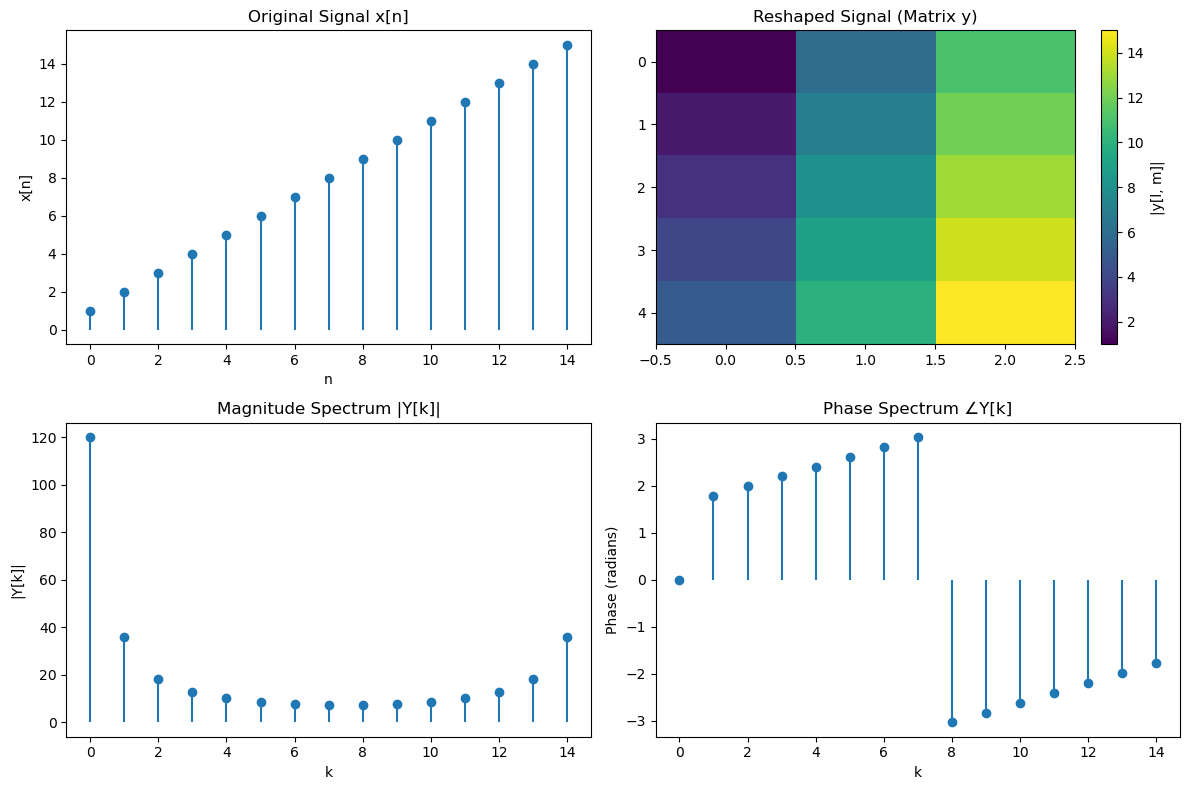

In [8]:
plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(2, 2, 1)
plt.stem(np.arange(N), x, basefmt=" ")
plt.title("Original Signal x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")

# Reshaped matrix
plt.subplot(2, 2, 2)
plt.imshow(np.abs(y), cmap='viridis', aspect='auto')
plt.colorbar(label="|y[l, m]|")
plt.title("Reshaped Signal (Matrix y)")

# Magnitude of Final Output
plt.subplot(2, 2, 3)
plt.stem(np.arange(N), np.abs(Y), basefmt=" ")
plt.title("Magnitude Spectrum |Y[k]|")
plt.xlabel("k")
plt.ylabel("|Y[k]|")

# Phase of Final Output
plt.subplot(2, 2, 4)
plt.stem(np.arange(N), np.angle(Y), basefmt=" ")
plt.title("Phase Spectrum ∠Y[k]")
plt.xlabel("k")
plt.ylabel("Phase (radians)")

plt.tight_layout()
plt.show()